<a href="https://colab.research.google.com/github/Ichigoboy12/AI/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/AI//Hw51/51.xlsx')
data = df.values  # Convert to NumPy array
df

,X1,X2,Y
0,0.9236,0.1804,2.0706
1,0.3265,0.2043,1.2847
2,0.3092,0.4284,2.1810
3,0.8299,0.6297,2.4410
4,0.8593,0.3363,2.8108
...,...,...,...
495,0.3960,0.9014,2.9156
496,0.4660,0.7002,2.2073
497,0.8787,0.9969,3.5919
498,0.2809,0.1881,1.2331


In [ ]:
X, y = data[:, :-1], data[:, -1]

# Use the first 300 for training and the last 200 for testing
X_train, y_train = X[:300], y[:300]
X_test, y_test = X[300:], y[300:]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Test MAE: 0.2578
Test R²: 0.6573


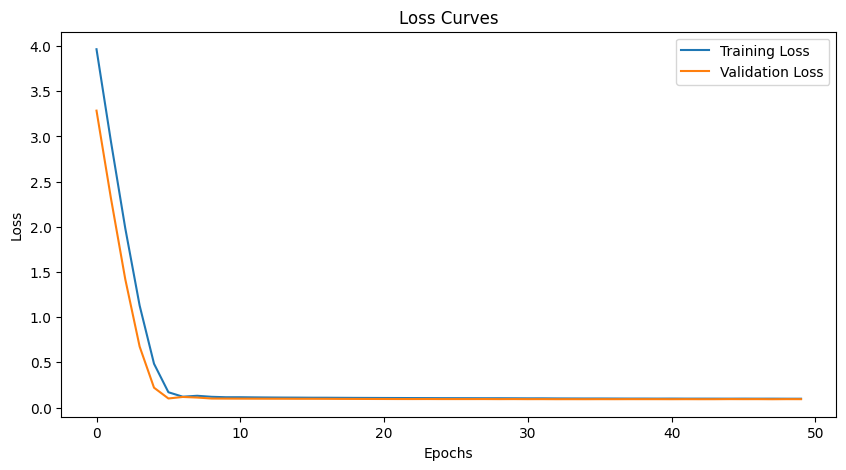

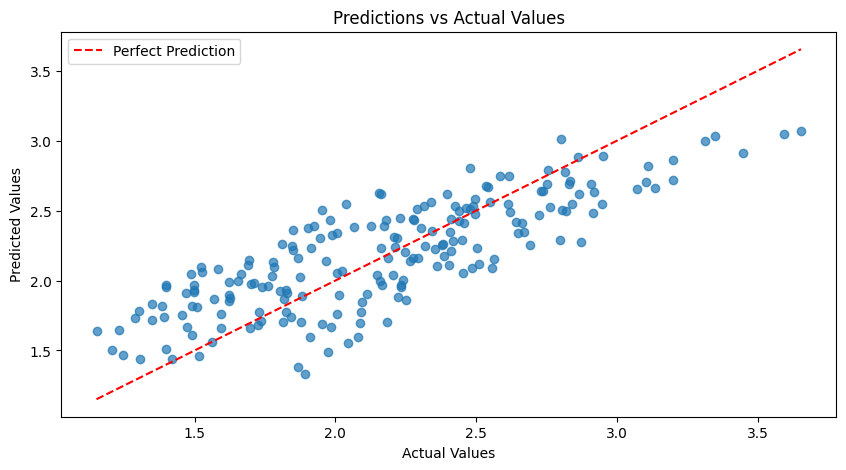

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score


# Load your data (assuming it's already loaded as X, y)
# Split data into training (first 300) and testing (last 200)
X_train, y_train = X[:300], y[:300]
X_test, y_test = X[300:], y[300:]

# Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the Neural Network
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=0)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate R²
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Test MAE: {test_mae:.4f}")
print(f"Test R²: {r2:.4f}")

# Visualize loss curves
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualize predictions vs actual values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 

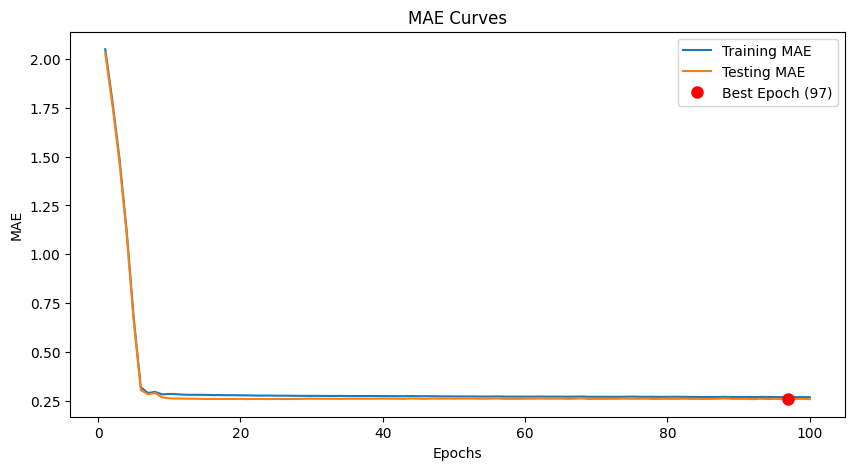

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


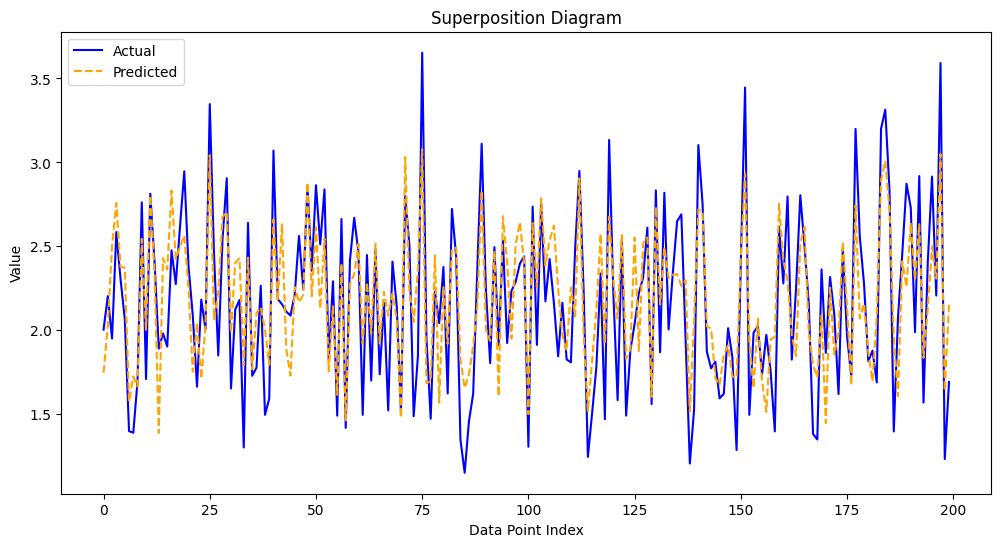

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_excel('/content/drive/MyDrive/AI//Hw51/51.xlsx')
data = df.values
df

X, y = data[:, :-1], data[:, -1]


X_train, y_train = X[:300], y[:300]
X_test, y_test = X[300:], y[300:]


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1)
])er='adam', loss='mse', metrics=['mae'])


best_epoch = 0
min_mae = float('inf')
mae_train_history = []
mae_test_history = []
epochs_range = range(1, 101)

for epoch in epochs_range:
  history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=1, batch_size=32, verbose=0)

  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  mae_train = mean_absolute_error(y_train, y_pred_train)
  mae_test = mean_absolute_error(y_test, y_pred_test)

  mae_train_history.append(mae_train)
  mae_test_history.append(mae_test)

  if mae_test < min_mae:
    min_mae = mae_test
    best_epoch = epoch


print(f"Best epoch: {best_epoch}")
print(f"Test MAE: {test_mae:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(epochs_range, mae_train_history, label='Training MAE')
plt.plot(epochs_range, mae_test_history, label='Testing MAE')

plt.plot(best_epoch, min_mae, 'ro', markersize=8, label=f'Best Epoch ({best_epoch})')

plt.title('MAE Curves')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

y_pred = model.predict(X_test)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', linestyle='solid', color='blue')
plt.plot(y_pred, label='Predicted',  linestyle='dashed', color='orange')
plt.title('Superposition Diagram')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.legend()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


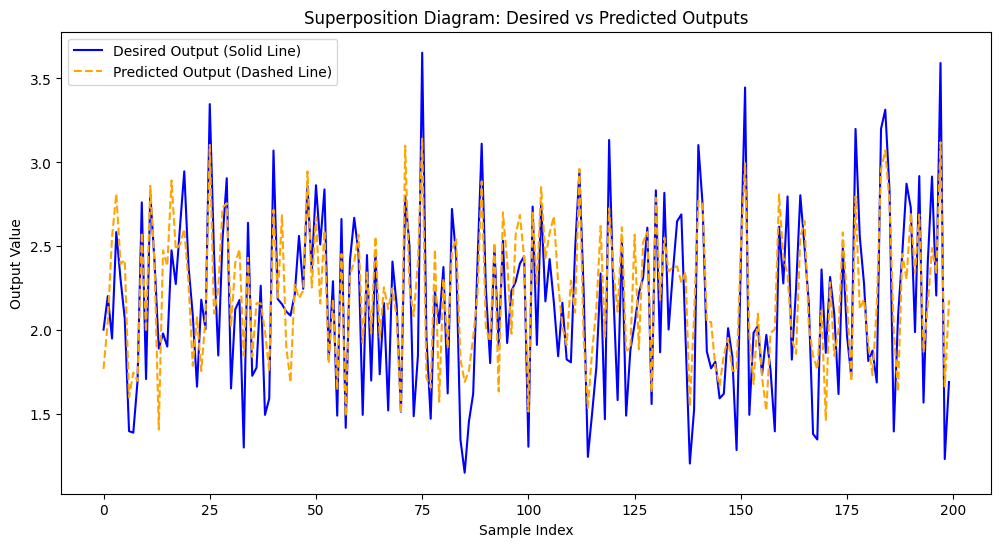

In [ ]:
y_pred = model.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Desired Output (Solid Line)', linestyle='solid', color='blue')
plt.plot(y_pred, label='Predicted Output (Dashed Line)', linestyle='dashed', color='orange')
plt.xlabel('Sample Index')
plt.ylabel('Output Value')
plt.title('Superposition Diagram: Desired vs Predicted Outputs')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import r2_score

# Step 1: Predict on the test data
y_pred = model.predict(X_test).flatten()  # Flatten to match the shape of y_test

# Step 2: Calculate test accuracy using R-squared
test_accuracy = r2_score(y_test, y_pred)  # R-squared as a measure of accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Step 3: Create a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
print(comparison_df)  # Display the entire DataFrame

# Optional: Save the DataFrame to a CSV file for review
# comparison_df.to_csv('actual_vs_predicted.csv', index=False)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Test Accuracy: 67.42%
     Actual  Predicted
0    2.0041   1.731711
1    2.2034   1.998739
2    1.9510   2.521441
3    2.5850   2.807575
4    2.3046   2.372141
..      ...        ...
195  2.9156   2.492558
196  2.2073   2.302833
197  3.5919   3.133167
198  1.2331   1.669471
199  1.6918   2.131794

[200 rows x 2 columns]
